# Code for Section 3.1 Stationary Transformations
This example documents the time series data that follows with the fortitudo.tech package.

The data consists of a time series simulation of an equity index, a risk-free zero-coupon interest rate curve, an implied volatility surface associated with the equity index, and a high-yield credit spread curve. There are 5040 observations that represent 20 years of data with 252 trading days. The simulation can be used for, e.g., validating risk modeling approaches and testing generative methods.

The model is fairly simple with "hand-calibrated" parameters. We keep the specification secret to avoid spoiling the fun of inferring the data generating process.

The interest rates, implied volatilities, and credit spreads are all in percent. Hence, you likely have to divide the values by 100 when you use them for pricing. The option strikes are all relative to the forward, i.e., "1y110" is the implied volatility with 1y maturity and a strike of 110% of the 1y forward price.

NOTE: the implied volatility surfaces are not guaranteed to be arbitrage-free, so take the implied volatilities as noisy estimates of "true" implied volatilities due to simulation noise.

In [1]:
import numpy as np
import pandas as pd
import fortitudo.tech as ft
import matplotlib.pyplot as plt

In [2]:
# Load the time series data and print some observations
time_series = ft.load_time_series()
time_series.head(10)

,Equity Index,1m,3m,6m,1y,2y,3y,4y,5y,6y,...,cr1y,cr2y,cr3y,cr4y,cr5y,cr6y,cr7y,cr8y,cr9y,cr10y
0,100.000000,0.306974,0.415789,0.568395,0.839313,1.269176,1.587154,1.825839,2.007783,2.148673,...,3.466530,3.387351,3.322905,3.270851,3.228836,3.194803,3.167063,3.144275,3.125390,3.109597
1,98.675317,0.315879,0.424345,0.576460,0.846504,1.274975,1.591918,1.829823,2.011171,2.151599,...,3.487529,3.404820,3.337619,3.283400,3.239669,3.204264,3.175415,3.151722,3.132090,3.115674
2,99.785099,0.316697,0.425130,0.577200,0.847164,1.275507,1.592355,1.830189,2.011482,2.151868,...,3.405938,3.336940,3.280444,3.234637,3.197572,3.167498,3.142957,3.122781,3.106052,3.092056
3,98.808764,0.314546,0.423064,0.575252,0.845427,1.274106,1.591204,1.829227,2.010664,2.151161,...,3.336271,3.278973,3.231614,3.192989,3.161614,3.136092,3.115230,3.098057,3.083807,3.071878
4,96.676413,0.311534,0.420170,0.572524,0.842995,1.272145,1.589593,1.827879,2.009518,2.150171,...,3.404906,3.336081,3.279721,3.234020,3.197039,3.167032,3.142546,3.122414,3.105722,3.091757
5,93.136449,0.319757,0.428070,0.579972,0.849635,1.277500,1.593992,1.831558,2.012646,2.152873,...,3.563844,3.468302,3.391084,3.328995,3.279030,3.238638,3.205761,3.178778,3.156433,3.137754
6,94.706933,0.313534,0.422091,0.574335,0.844610,1.273447,1.590663,1.828774,2.010279,2.150828,...,3.498315,3.413792,3.345176,3.289845,3.245233,3.209123,3.179705,3.155547,3.135531,3.118795
7,95.752442,0.314326,0.422852,0.575053,0.845249,1.273963,1.591087,1.829128,2.010580,2.151089,...,3.511663,3.424896,3.354528,3.297820,3.252118,3.215136,3.185013,3.160280,3.139790,3.122658
8,93.921376,0.317886,0.426273,0.578277,0.848124,1.276281,1.592991,1.830721,2.011934,2.152258,...,3.674271,3.560146,3.468427,3.394947,3.335959,3.288352,3.249647,3.217906,3.191634,3.169682
9,92.288751,0.304706,0.413610,0.566341,0.837481,1.267699,1.585941,1.824825,2.006920,2.147928,...,3.811632,3.674370,3.564600,3.476945,3.406733,3.350152,3.304197,3.266539,3.235386,3.209364


# Equity Index time series plot

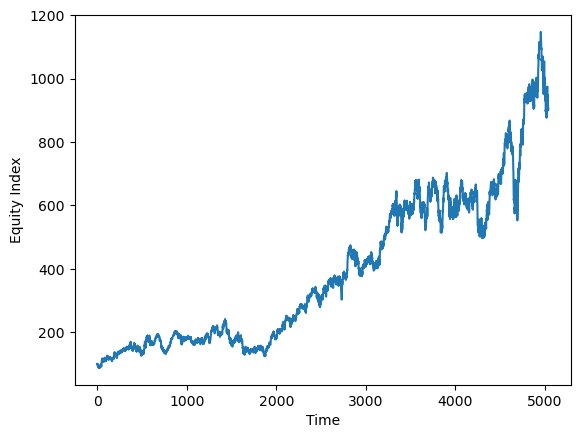

In [3]:
# Plot equity index time series
plt.plot(time_series['Equity Index'])
plt.xlabel('Time')
plt.ylabel('Equity Index')
plt.show()

# Zero-coupon curves plots

In [4]:
# Function for plotting zero-coupon curves
def plot_zc_curve(i):
    rates_maturities = np.hstack((np.array([1/12, 1/4, 1/2]), np.arange(1, 31)))
    plt.plot(rates_maturities, time_series.values[i, 1:34])
    plt.xlabel('Maturity')
    plt.ylabel('Zero-coupon interest rate')

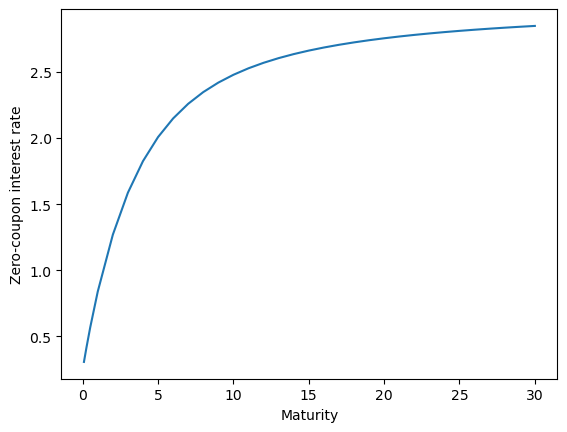

In [5]:
# Initial interest rate curve
plot_zc_curve(0)

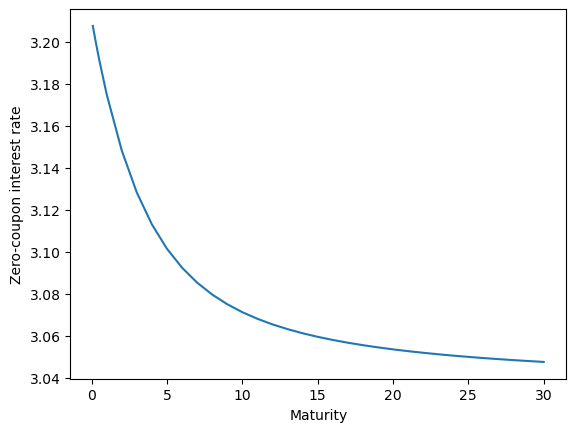

In [6]:
# An inverted interest rate curve
plot_zc_curve(2100)

# Implied volatility surface plots

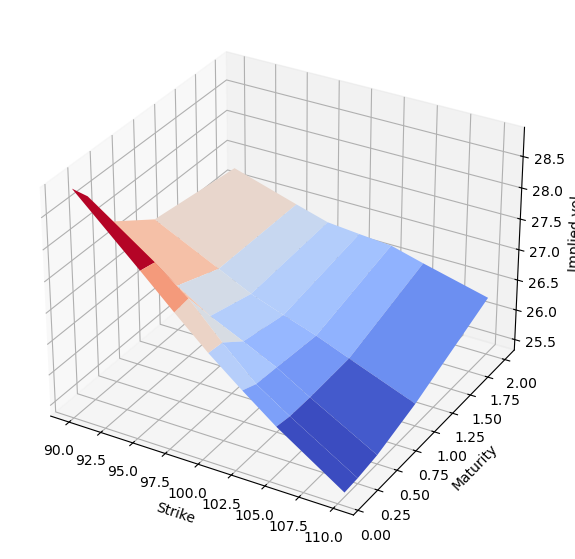

In [7]:
# Initial vol surface
_ = ft.plot_vol_surface(0, time_series.values[:, 34:69])

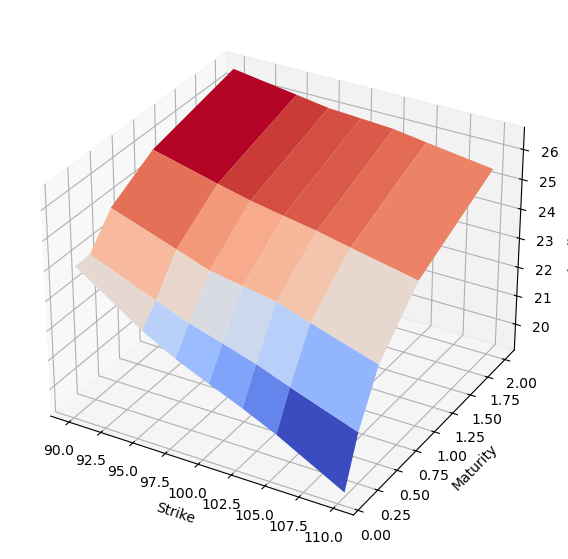

In [8]:
# Another vol surface
_ = ft.plot_vol_surface(1000, time_series.values[:, 34:69])

# Credit spreads plots

In [9]:
# Function for plotting credit spread curves
def plot_cr_curve(i):
    plt.plot(np.arange(1, 11), time_series.values[i, 69:])
    plt.xlabel('Maturity')
    plt.ylabel('Credit spread')

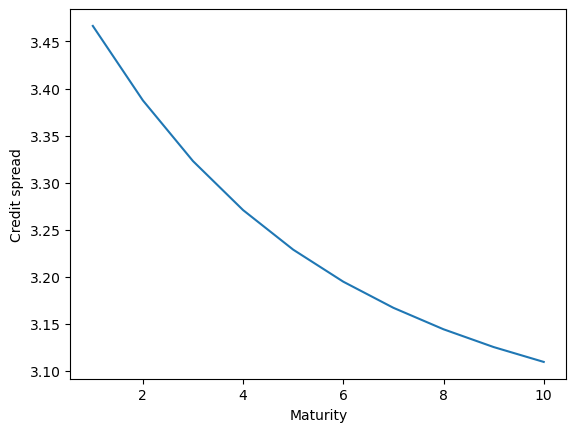

In [10]:
# Initial credit spread curve
plot_cr_curve(0)

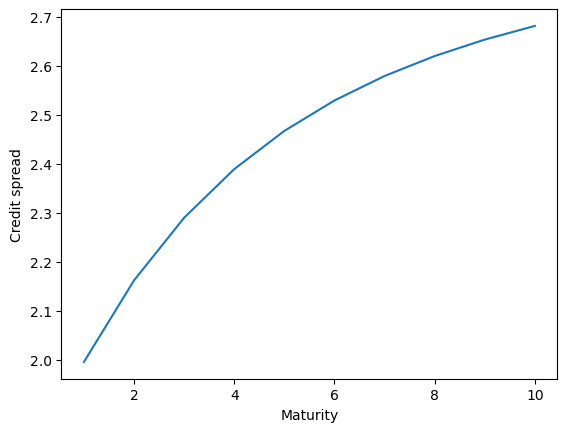

In [11]:
# Positive slope curve
plot_cr_curve(1000)

# Stationary transformations
Below are some examples of the stationary transformations that we can perform to make the data easier for us to project into the future. In summary, for the equity index and implied volatilities, we use the log change. For the government bond zero-coupon interest rates, we transform them into constant maturity discount factors and apply log changes to these. For the credit spread, we perform the same transformation as for the zero-coupon bonds, while the quantity becomes harder to interpret.

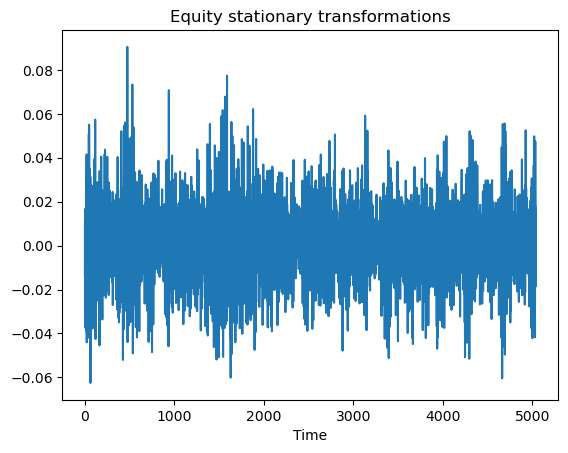

In [12]:
# Compute equity stationary transformations
eqt_log_chg = np.diff(np.log(time_series.iloc[:, 0]))
plt.plot(eqt_log_chg)
plt.title('Equity stationary transformations')
plt.xlabel('Time')
plt.show()

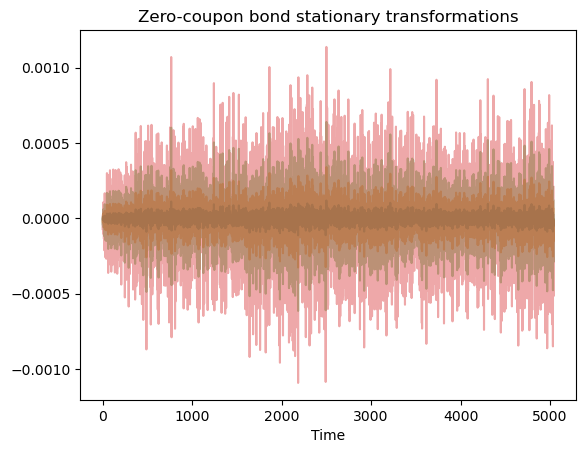

In [13]:
# Compute government bond stationary transformations
zcb_maturities = np.hstack((np.array([1/12, 1/4, 1/2]), np.arange(1, 31)))
zcb_df = np.exp(-time_series.iloc[:, 1:34] / 100 * zcb_maturities)
zcb_log_chg = np.diff(np.log(zcb_df), axis=0)
plt.plot(zcb_log_chg[:, [0, 1, 2, 3]], alpha=0.4)
plt.title('Zero-coupon bond stationary transformations')
plt.xlabel('Time')
plt.show()

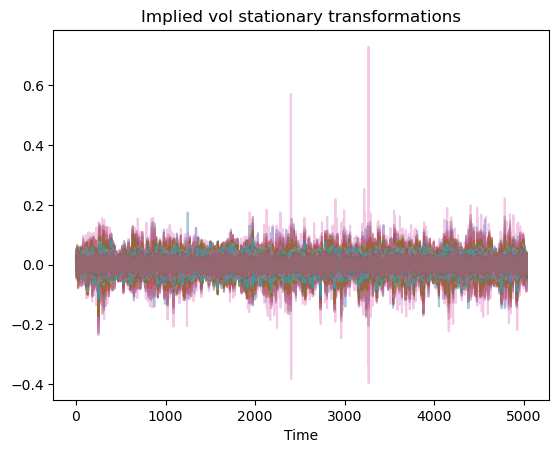

In [14]:
# Compute implied vol stationary transformations
vol_log_chg = np.diff(np.log(time_series.iloc[:, 34:69]), axis=0)
plt.plot(vol_log_chg, alpha=0.4)
plt.title('Implied vol stationary transformations')
plt.xlabel('Time')
plt.show()

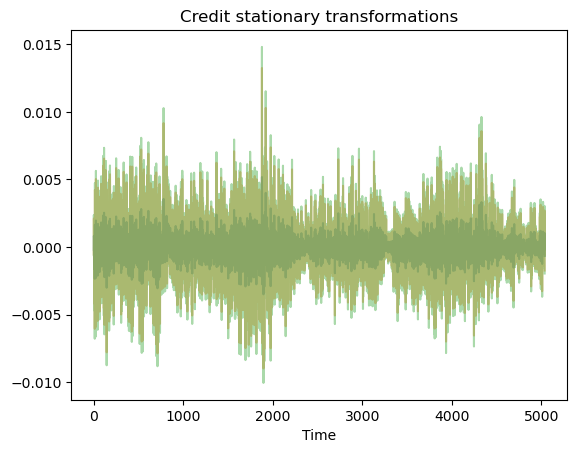

In [15]:
# Compute credit stationary transformations
cr_maturities = np.arange(1, 11)
cr_df = np.exp(-time_series.iloc[:, 69:] / 100 * cr_maturities)
cr_log_chg = np.diff(np.log(cr_df), axis=0)
plt.plot(cr_log_chg[:, [0, 4, 9]], alpha=0.4)
plt.title('Credit stationary transformations')
plt.xlabel('Time')
plt.show()

# Store stationary transformations for future analysis

In [16]:
st_df = pd.DataFrame(
    np.hstack((eqt_log_chg[:, np.newaxis], zcb_log_chg, vol_log_chg, cr_log_chg)),
    columns=time_series.columns)
st_df.to_csv('st_df.csv')

In [ ]:
# pcrm-book - Next generation investment analysis.
# Copyright (C) 2025 Anton Vorobets.

# This program is free software: you can redistribute it and/or modify
# it under the terms of the GNU General Public License as published by
# the Free Software Foundation, either version 3 of the License, or
# (at your option) any later version.

# This program is distributed in the hope that it will be useful,
# but WITHOUT ANY WARRANTY; without even the implied warranty of
# MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE. See the
# GNU General Public License for more details.

# You should have received a copy of the GNU General Public License
# along with this program.  If not, see <https://www.gnu.org/licenses/>.